In [1]:
import math as mt
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import randint, uniform

from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU

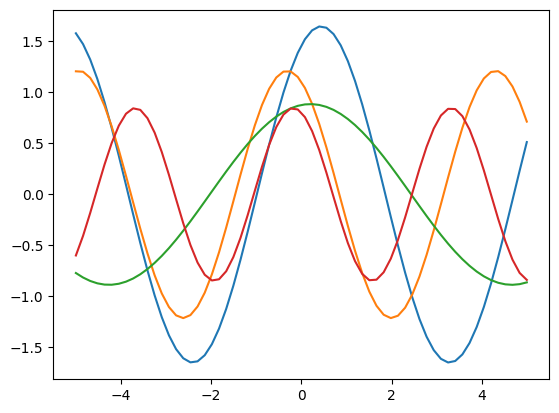

In [2]:
X_MIN = -5.0
X_MAX = 5.0
SAMPLE_LEN = 64
X_COORDS = np.linspace(X_MIN , X_MAX, SAMPLE_LEN)
fig, axis = plt.subplots(1, 1)
for i in range(4):
    axis.plot(X_COORDS, uniform(0.1,2.0)*np.sin(uniform(0.2,2.0)*X_COORDS + uniform(2)))

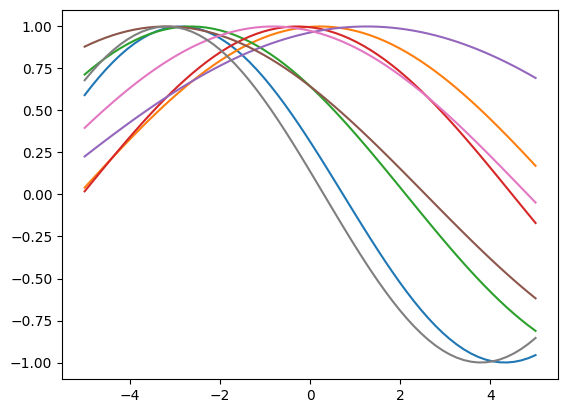

In [3]:
SAMPLE_LEN = 64   
SAMPLE_SIZE = 100
X_MIN = -5.0
X_MAX = 5.0

X_COORDS = np.linspace(X_MIN , X_MAX, SAMPLE_LEN)

SAMPLE = np.zeros((SAMPLE_SIZE, SAMPLE_LEN))

for i in range(0, SAMPLE_SIZE):
    b = uniform(0.5, 0.2)
    c = uniform(mt.pi)
    SAMPLE[i] = np.array([np.sin(b * x + c) for x in X_COORDS])
    
fig, axis = plt.subplots(1, 1)

for i in range(8):
    axis.plot(X_COORDS, SAMPLE[i])

In [4]:
discriminator = Sequential()
discriminator.add(Dense(SAMPLE_LEN, activation="relu"))
discriminator.add(Dropout(0.4))
discriminator.add(Dense(SAMPLE_LEN, activation="relu"))
discriminator.add(Dropout(0.4))
discriminator.add(Dense(1, activation="sigmoid"))
discriminator.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

generator = Sequential()
generator.add(Dense(SAMPLE_LEN))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(SAMPLE_LEN, activation="tanh"))
generator.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

gan = Sequential()
gan.add(generator)
gan.add(discriminator)
gan.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [5]:
EPOCHS = 64
BATCH = 6
NOISE = np.random.uniform(X_MIN, X_MAX, size=(SAMPLE_SIZE, SAMPLE_LEN))
ONES = np.ones((BATCH, 1))
ZEROS = np.zeros((BATCH, 1))

print("epoch | dis. loss | dis. acc | gen. loss | gen. acc")
print("------+-----------+----------+-----------+----------")

fig = plt.figure(figsize=(8, 12))
ax_index = 1

for i in range(EPOCHS):
    for j in range(SAMPLE_SIZE // BATCH):
        n = randint(0, SAMPLE_SIZE, size=BATCH)
        p = generator.predict(NOISE[n])
        x = np.concatenate((SAMPLE[n], p), axis=0)
        y = np.concatenate((ONES, ZEROS))
        d_result = discriminator.train_on_batch(x, y)
        discriminator.trainable = False
        g_result = generator.train_on_batch(NOISE[n], ONES)
        discriminator.trainable = True

    print(f" {i:04n} |  {d_result[0]:.5f}  |  {d_result[1]:.5f} |  {g_result[0]:.5f}  |  {d_result[1]:.5f}")
    
    if i % 10 == 3:
        ax = fig.add_subplot(8, 1, ax_index)
        plt.plot(X_COORDS, p[-1])
        ax.xaxis.set_visible(False)
        plt.ylabel(f"Epoch: {i}")
        ax_index += 1
        
y = generator.predict(np.random.uniform(X_MIN, X_MAX, size=(1, SAMPLE_LEN)))[0]
ax = fig.add_subplot(8, 1, ax_index)
plt.plot(X_COORDS, y)

epoch | dis. loss | dis. acc | gen. loss | gen. acc
------+-----------+----------+-----------+----------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


AttributeError: 'NoneType' object has no attribute 'update_state'

<Figure size 800x1200 with 0 Axes>